In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/age_predictions_cleaned.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,PAQ605,BMXBMI,LBXGLU,LBXGLT,LBXIN,age_group
0,2.0,1.393867,110.0,150.0,14.91,0
1,2.0,1.099498,89.0,80.0,3.85,0
2,2.0,0.629968,89.0,68.0,6.14,0
3,2.0,0.292901,104.0,84.0,16.15,0
4,1.0,1.426249,103.0,81.0,10.92,0


In [ ]:
# Renaming columns with simpler names
df = df.rename(columns={
    'PAQ605': 'Physical_Activity',
    'BMXBMI': 'BMI',
    'LBXGLU': 'Glucose',
    'LBXGLT': 'Biomarker',
    'LBXIN': 'Insulin'
})

In [ ]:
df.head()

,Physical_Activity,BMI,Glucose,Biomarker,Insulin,age_group
0,2.0,1.393867,110.0,150.0,14.91,0
1,2.0,1.099498,89.0,80.0,3.85,0
2,2.0,0.629968,89.0,68.0,6.14,0
3,2.0,0.292901,104.0,84.0,16.15,0
4,1.0,1.426249,103.0,81.0,10.92,0


In [ ]:
# Start by analyzing the structure of the dataset
df.info()

# Check for missing values
missing_values = df.isnull().sum()

# Statistical summary of the dataset
df_description = df.describe()

missing_values, df_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Physical_Activity  3524 non-null   float64
 1   BMI                3524 non-null   float64
 2   Glucose            3524 non-null   float64
 3   Biomarker          3524 non-null   float64
 4   Insulin            3524 non-null   float64
 5   age_group          3524 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 165.3 KB


(Physical_Activity    0
 BMI                  0
 Glucose              0
 Biomarker            0
 Insulin              0
 age_group            0
 dtype: int64,
        Physical_Activity          BMI      Glucose    Biomarker      Insulin  \
 count        3524.000000  3524.000000  3524.000000  3524.000000  3524.000000   
 mean            1.860085     0.717786    98.952530   116.379011     9.882826   
 std             0.332242     0.569344    10.174653    35.284517     6.259255   
 min             1.000000     0.001468    63.000000    40.000000     0.140000   
 25%             2.000000     0.297993    92.000000    92.000000     5.340404   
 50%             2.000000     0.591333    98.000000   110.000000     8.220000   
 75%             2.000000     0.979190   104.046062   137.088293    12.771938   
 max             2.000000     3.595801   142.000000   221.000000    38.430000   
 
          age_group  
 count  3524.000000  
 mean      0.500000  
 std       0.500071  
 min       0.000000  


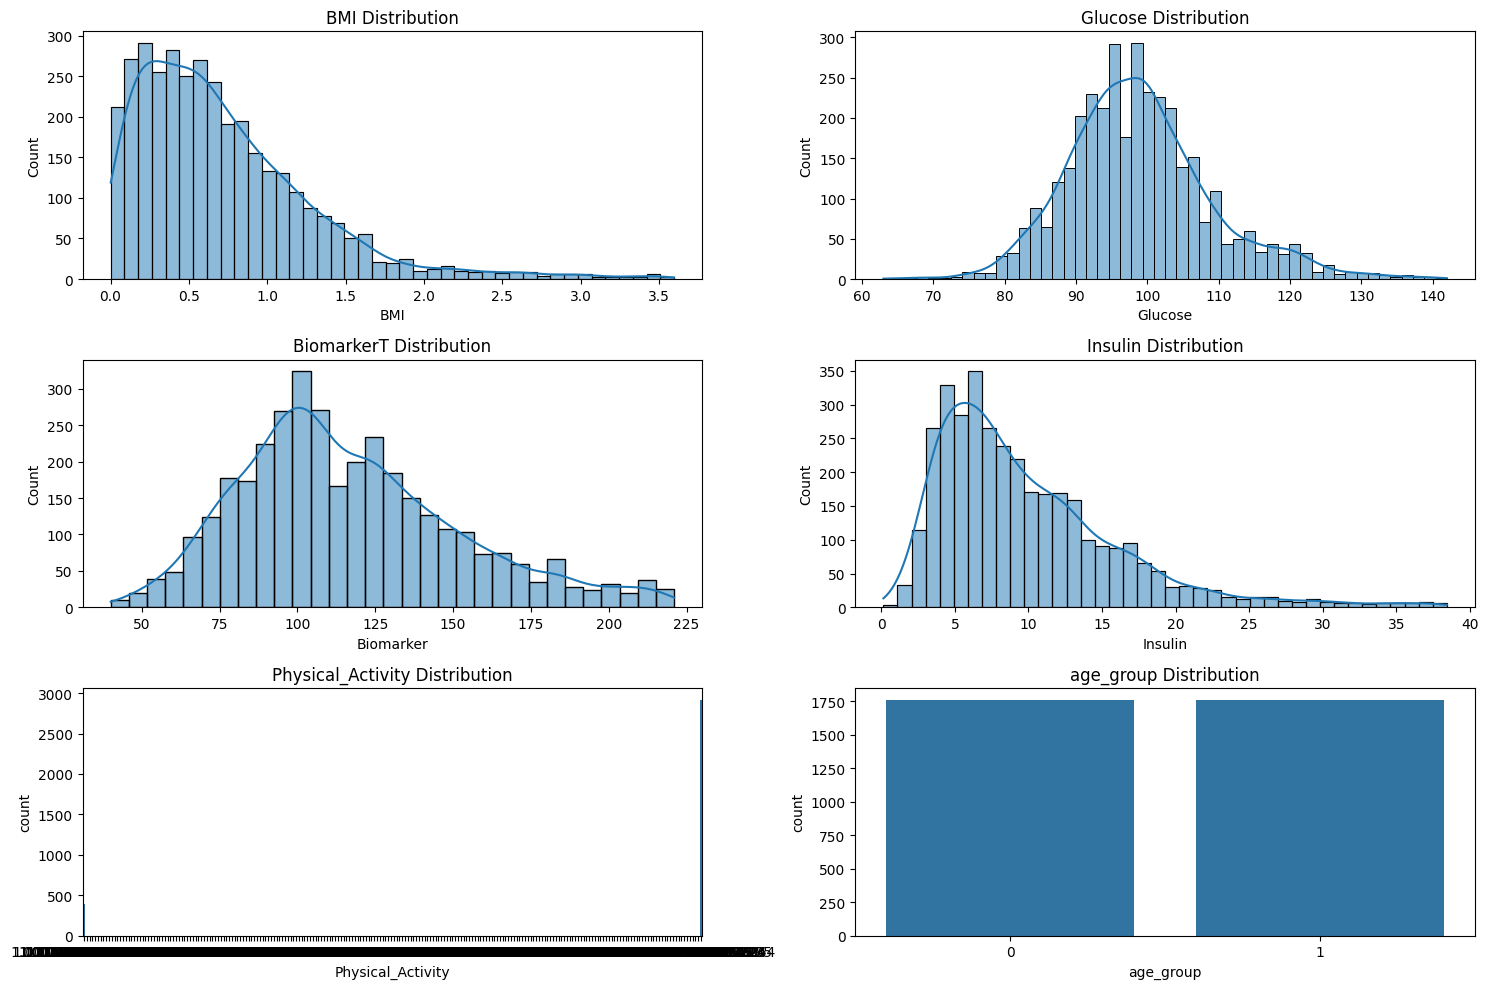

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of each feature
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Continuous variable distributions
sns.histplot(df['BMI'], ax=axes[0, 0], kde=True).set(title='BMI Distribution')
sns.histplot(df['Glucose'], ax=axes[0, 1], kde=True).set(title='Glucose Distribution')
sns.histplot(df['Biomarker'], ax=axes[1, 0], kde=True).set(title='BiomarkerT Distribution')
sns.histplot(df['Insulin'], ax=axes[1, 1], kde=True).set(title='Insulin Distribution')

# Categorical variable distribution (PAQ605)
sns.countplot(x='Physical_Activity', data=df, ax=axes[2, 0]).set(title='Physical_Activity Distribution')

# Target variable distribution (age_group)
sns.countplot(x='age_group', data=df, ax=axes[2, 1]).set(title='age_group Distribution')

plt.tight_layout()
plt.show()


In [ ]:
# BMXBMI, LBXGLU, LBXGLT, and LBXIN: These continuous variables appear to have varying degrees of skewness. BMXBMI is notably right-skewed, while LBXGLU and LBXGLT seem more normally distributed.
# PAQ605: This categorical variable is heavily skewed towards the value of 2.
# age_group: The target variable (binary) is evenly distributed between the two classes, which is good for classification purposes.


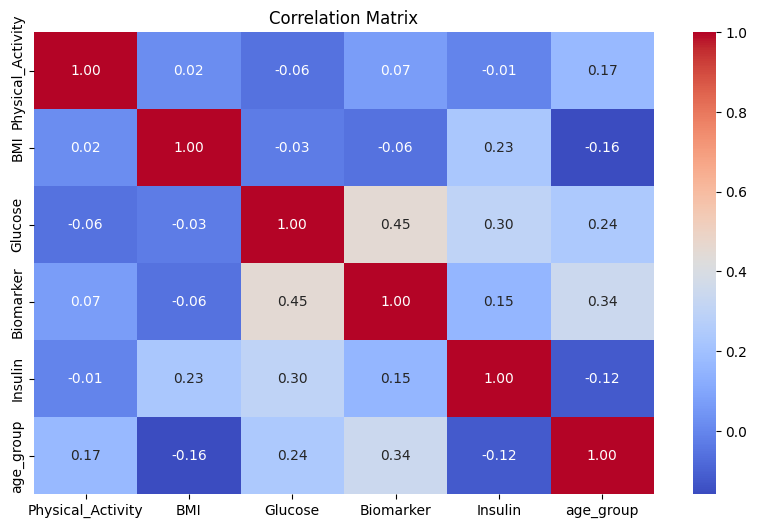

,Physical_Activity,BMI,Glucose,Biomarker,Insulin,age_group
Physical_Activity,1.000000,0.021212,-0.058469,0.070301,-0.008653,0.169938
BMI,0.021212,1.000000,-0.029418,-0.056102,0.227299,-0.158305
Glucose,-0.058469,-0.029418,1.000000,0.450653,0.302570,0.237563
Biomarker,0.070301,-0.056102,0.450653,1.000000,0.154018,0.344320
Insulin,-0.008653,0.227299,0.302570,0.154018,1.000000,-0.118213
age_group,0.169938,-0.158305,0.237563,0.344320,-0.118213,1.000000


In [ ]:
# Compute and visualize the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

correlation_matrix


In [ ]:
# The correlation matrix reveals the following key insights:

# age_group is positively correlated with LBXGLT (0.34) and LBXGLU (0.24), indicating these variables may be useful in predicting the target.
# BMXBMI has a weak negative correlation with age_group (-0.16).
# PAQ605 shows a weak positive correlation with age_group (0.17).
# These correlations provide a preliminary understanding of the relationships between features and the target, which will guide the model-building process.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare data for modeling
X = df.drop('age_group', axis=1) #In pandas, axis=1 refers to columns, and axis=0 refers to rows.
y = df['age_group']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the continuous features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train models
log_reg.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate models
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
rf_acc = accuracy_score(y_test, y_pred_rf)

log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)
rf_cm = confusion_matrix(y_test, y_pred_rf)

# log_reg_report = classification_report(y_test, y_pred_log_reg)
# rf_report = classification_report(y_test, y_pred_rf)

# (log_reg_acc, rf_acc), (log_reg_cm, rf_cm), (log_reg_report, rf_report)


In [ ]:
rf_acc,log_reg_acc

(0.8534971644612477, 0.6880907372400756)

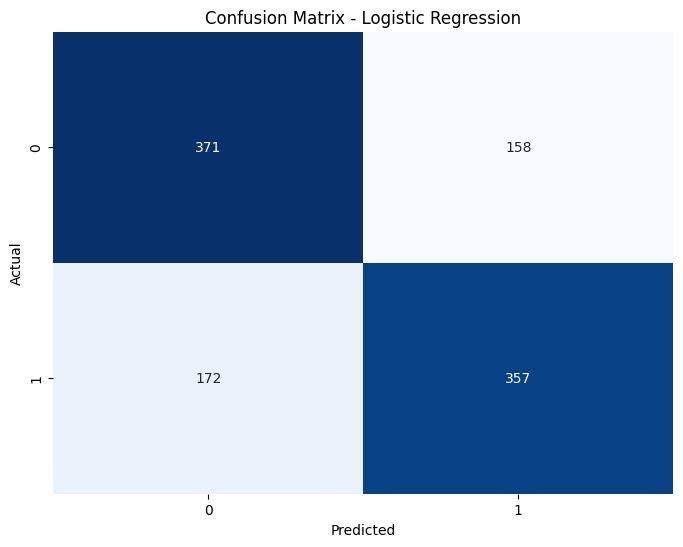

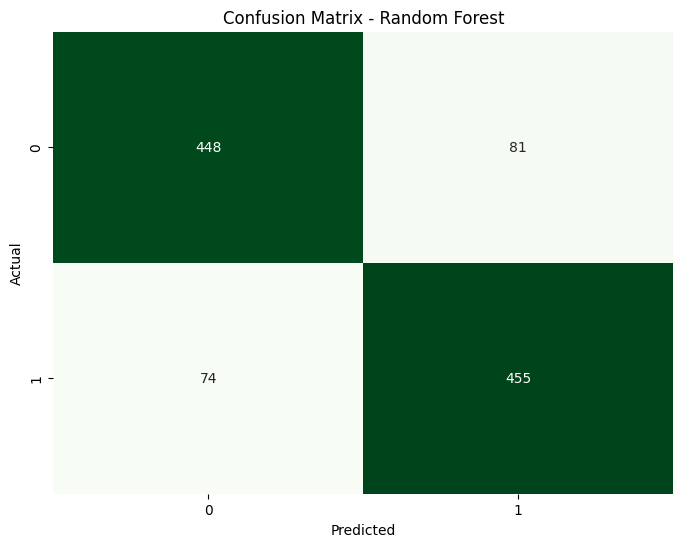

In [ ]:
# Visualizing confusion matrices for Logistic Regression and Random Forest
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
